In [ ]:
!pip install --upgrade pip
!pip install CFEDemands --upgrade --pre
!pip install xarray --upgrade
!pip install h5netcdf

In [ ]:
import cfe

In [ ]:
r = cfe.result.from_dataset('Ethiopia_small.ds')

In [ ]:
r.get_alpha(as_df=True).dropna()

In [ ]:
r.get_beta(as_df=True).dropna()

In [ ]:
r.delta.to_dataframe().unstack('k').dropna()

In [ ]:
t = r.firstround  # First round
m = r.coords['m'][0] # First market

x = r.get_predicted_expenditures().sum('i')
medianx = x.where(x>0).sel(t=t,m=m).median('j').values # Budget (median household)

In [ ]:
xbar=r.demands(medianx) # Expenditures given median budget
xbar

In [ ]:
r.coords['u']

In [ ]:
import numpy as np
from math import log
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
foods = "Haricot Beans"
ref_price = r.prices.sel(t=t,m=m,u='Kg')
def x(n): #Price of good,n is the price scale.
    return n*ref_price.loc[foods].values
def y(h): #Quantity demand of good,h is the price scale, h=n.
    return r.demands(medianx, p={foods:h})[foods]/ref_price.loc[foods].values
np.array([y(1),0.5*y(1),1.5*y(1)])

array([1.78513063, 0.89256531, 2.67769594])

In [38]:
#Convert price scale to real price.
Prices = np.array([x(0.1),x(0.15),x(0.2),x(0.25),x(0.3),x(0.35),x(0.4),x(0.45),x(0.5),x(0.55),x(0.6),x(0.65),x(0.7),x(0.75),x(0.8),x(0.85),x(0.9),x(0.95),x(1),x(1.5)])
#Quantity demand with given price.
D1 = np.array([y(0.1),y(0.15),y(0.2),y(0.25),y(0.3),y(0.35),y(0.4),y(0.45),y(0.5),y(0.55),y(0.6),y(0.65),y(0.7),y(0.75),y(0.8),y(0.85),y(0.9),y(0.95),y(1),y(1.5)])

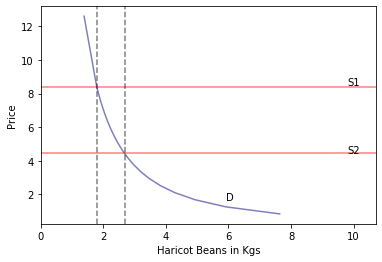

In [122]:
plt.plot(D1,Prices,color="navy",alpha = 0.5)

plt.annotate("S1", xy = (5.5*y(1),1.01*x(1)))

plt.annotate("D", xy = (y(0.15),x(1)*0.2))

plt.axhline(y = x(1), color = "red", alpha = 0.5)

plt.axvline(x = y(1), color = "black", alpha = 0.5, linestyle = "--")

#If we want to increase quantity demand by 50%,then

NQD = (1+(0.5))*y(1)

plt.axvline(x = NQD, color = "black", alpha = 0.5, linestyle = "--")

plt.axhline(y = NP, color = "Red", alpha = 0.5)

plt.annotate("S2", xy = (5.5*y(1),1.01*NP))

plt.xlabel("%s in Kgs" % foods)
plt.ylabel("Price")
plt.xlim([0,6*y(1)])
plt.show()

In [123]:
#New equilibrium price 
NP = np.interp(NQD,D1[::-1],Prices[::-1])
Cost = (x(1)-NP)*(NQD-y(1))
if NQD > x(1):
        print("The cost of subsidy for " + foods + " for a median income household in Ethiopia is" ,format(Cost))
else:
            print("The revenue of tax for " + foods + " for a median income household in Ethiopia is" ,format(Cost))

The revenue of tax for Haricot Beans for a median income household in Ethiopia is 3.5372134570580687


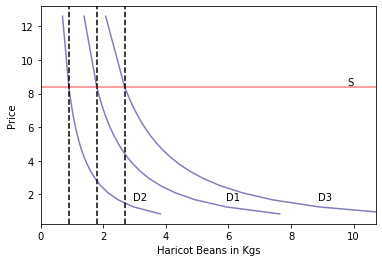

In [117]:
e,g = 0.5,1.5 

#e times budget.
D2 = list(map(lambda x:x*e, D1))
#g times budget.
D3 = list(map(lambda x:x*g, D1))

plt.plot(D1,Prices,D2,Prices,D3,Prices,color="navy",alpha = 0.5)

plt.annotate("S", xy = (5.5*y(1),1.01*x(1)))

plt.annotate("D1", xy = (y(0.15),x(1)*0.2))
plt.annotate("D2", xy = (e*y(0.15),x(1)*0.2))
plt.annotate("D3", xy = (g*y(0.15),x(1)*0.2))

plt.axvline(x = y(1), color = "black",linestyle = "--")
plt.axhline(y = x(1), color = "red", alpha = 0.5)
plt.axvline(x = e*y(1), color = "black",linestyle = "--")
plt.axvline(x = g*y(1), color = "black",linestyle = "--")

plt.xlabel("%s in Kgs" % foods)
plt.ylabel("Price")
plt.xlim([0,4*g*y(1)])
plt.show()

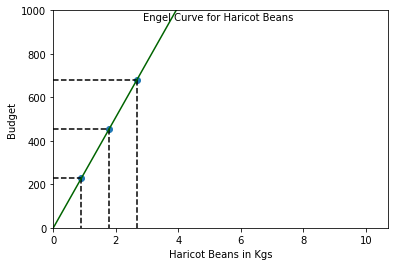

In [104]:
#Construct a Engel Curve
BC1 = np.linspace(0,y(1),100)
BC1_1 = np.linspace(y(1),y(1),100)
BC2 = np.linspace(0,g*y(1),100)
BC2_1 = np.linspace(g*y(1),g*y(1),100)
BC3 = np.linspace(0,e*y(1),100)
BC3_1 = np.linspace(e*y(1),e*y(1),100)


Q1 = np.linspace(medianx,0,100)
Q2 = np.linspace(g*medianx,0,100)
Q3 = np.linspace(e*medianx,0,100)
P1 = np.linspace(medianx,medianx,100)
P2 = np.linspace(g*medianx,g*medianx,100)
P3 = np.linspace(e*medianx,e*medianx,100)
EC = np.linspace(0,1.5*g*y(1),100)
P4 = np.linspace(0,1.5*g*medianx,100)
fig, ax = plt.subplots()

ax.plot([0.5*y(1),y(1),1.5*y(1)],[0.5*medianx,medianx,1.5*medianx],ls="",marker="o")

plt.annotate("Engel Curve for "+ foods, xy = (1.6*y(1),2.1*medianx))

plt.xlim([0,6*y(1)])
plt.ylim([0,1000])
plt.xlabel("%s in Kgs" % foods)
plt.ylabel("Budget")
plt.plot(BC1,P1,"black",BC2,P2,"black",BC3,P3,"black",BC1_1,Q1,"black",BC2_1,Q2,"black",BC3_1,Q3,"black",linestyle="--")
plt.plot(EC,P4,"darkgreen")

In [105]:
100*(g*y(1)-y(1))/(g*medianx-medianx)

0.3929075780677838